In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf #use to train the classifier

learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [8]:
# import the dtaset

mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
# there are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [10]:
# display some digits
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)
    

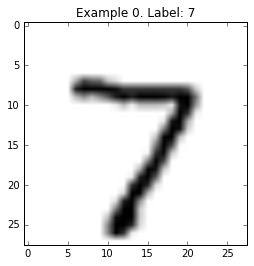

In [11]:
display(0)

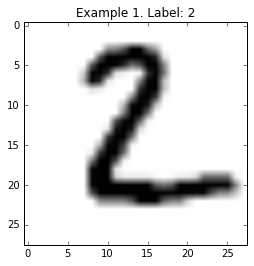

In [12]:
display(1)

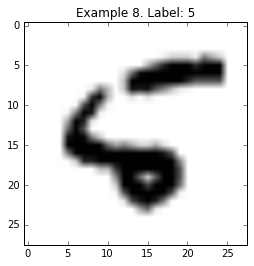

In [13]:
display(8)

In [14]:
print len(data[0]) #number of features

784


In [22]:
# fit a linear classifier
# goal here is to get about 90% accuracy with this simple classifier

feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier()

In [24]:
# evaluate accuracy
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)['accuracy']

0.9141


Predicted 7, Label: 7


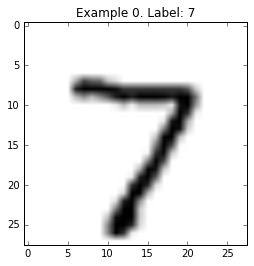

In [30]:
# classify a few examples
print ('Predicted %d, Label: %d' % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

Predicted 6, Label: 5


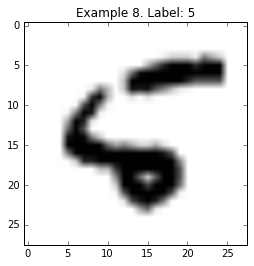

In [32]:
# and one it gets wrong
print ('Predicted %d, Label: %d' % (classifier.predict(test_data[8]), test_labels[8]))
display(8)       

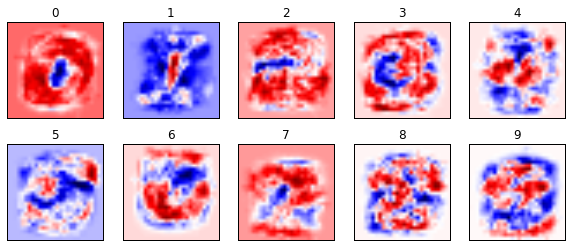

In [35]:
# visualize learned weights
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

In [36]:
# not very familiar with the attributes and functions yet.
# however, general steps are: load the data, train the test data (fitting into a classifier), and evaluate accuracy 